In [1]:
import pandas as pd
import matplotlib.pyplot as plt	

In [2]:
def gct2df (file , summary = False): # convert the given gct file to dataframe 
    df =  pd.read_csv(file, sep='\t',skiprows=2) 
    # we will skip the first two rows as they do not contain the biological data 
    if summary:   
        print("number of rows imported", df.shape[0], "\number of columns imported", df.shape[1])
        
    return df

In [3]:
def get_histogram(df, req_columns):
    for col in req_columns:
        df.hist(column= col,
                grid=True,
                figsize=(12, 5),
                legend=True,
                bins=30,
                color='#6EBF8B');

In [4]:
def get_sample_data(df):
    temp_df = df.iloc[: , 2:] # copying the datafram without name & description as they are not required 
    
    data = {
        'Sample name':[],
        'Mean':[],
        'Median':[],
        'Standard deviation':[]
       }
    
    sample_data = pd.DataFrame(data)   # req_df will contain the sample data
    for column in temp_df:
        
        #collecting the data
        mean = temp_df[column].mean()   
        median = temp_df[column].median()
        std = temp_df[column].std()
        
        # filling up  a new row
        new_row = {'Sample name':column, 'Mean':mean, 'Median':median, 'Standard deviation':std}
        
        # add the new row to the required data frame
        sample_data = sample_data.append(new_row, ignore_index=True)
    
    return sample_data

In [5]:
def apply_filter(df):
    std_of_rows = [] 
    row_std = df.std(ddof=0, axis=1) # row_std will contain std of each row  
    
    for idx, row in df.iterrows():  # making an array of tuple containing { row index, its std }
        std = row_std[idx]
        tup = (idx, std)
        std_of_rows.append(tup)

    std_of_rows.sort(key = lambda x: x[1]) # sorting based on their std
    total = len(std_of_rows)
    
    cnt = 0 # count will keep number of rows removed
    for tup in reversed(std_of_rows):   # reversed as we have to remove the highest first
        if cnt * 10 > total:        # stop when  < 10%  of rows are removed
            break
        df.drop(index = tup[0], inplace = True) # removing the rows
        cnt+= 1
        
    return df

In [6]:
#Task 2a
file2a = 'https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct'
df2a = gct2df(file2a, True)
df2a.head()

number of rows imported 60 
umber of columns imported 21


,Name,Description,A7-A0CE-Normal,A7-A0CH-Normal,A7-A0D9-Normal,A7-A0DB-Normal,A7-A13E-Normal,A7-A13F-Normal,A7-A13G-Normal,AC-A23H-Normal,...,AC-A2FF-Normal,3C-AAAU-Tumor,3C-AALI-Tumor,3C-AALJ-Tumor,3C-AALK-Tumor,4H-AAAK-Tumor,5L-AAT0-Tumor,5L-AAT1-Tumor,5T-A9QA-Tumor,A1-A0SD-Tumor
0,COL1A1,NCBI Gene ID: 1277,52818.7302,23289.8919,17914.9695,146930.9278,63379.9398,19315.6713,19445.3030,39508.7217,...,80352.2176,55574.1671,179261.0114,180821.3962,434556.8887,413984.2553,245821.9680,274034.2298,6924.6862,103816.3924
1,SCD,NCBI Gene ID: 6319,5162.2222,54122.0498,35382.3829,12003.6082,235057.2000,147841.0418,469109.8007,16582.8786,...,6992.3738,1221.8155,31061.4464,2353.5811,21556.4750,6122.9787,1089.8959,2915.2404,9206.5900,11031.6765
2,CPB1,NCBI Gene ID: 1360,5948.8889,844.0056,84.0122,116.4948,117.5835,56.5784,45.1403,117.0051,...,17.6053,73289.9753,17.9445,2205.8024,120.8109,5.5319,187.7108,36.6748,1242.1548,405206.1864
3,COL1A2,NCBI Gene ID: 1278,44192.3810,40442.3131,36163.4420,138082.4742,61262.4612,30477.7728,28655.1444,71110.8328,...,61940.1588,34666.8183,98721.5878,94717.1351,236807.6127,298457.0213,155623.9918,166129.5844,3464.9582,86413.0345
4,ADIPOQ,NCBI Gene ID: 9370,1317.1429,23352.3272,121017.3116,51822.6804,57953.0471,29523.1253,293105.3274,12135.9692,...,255.4164,35.8445,119.0865,1813.2366,33.9264,106.3830,26.3968,36.6748,0.0000,1599.2060


In [7]:
#Task 2b
file2b = 'https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct'
df2b = gct2df(file2b)
df2b.head()

,Name,Description,A7-A0CE-normal,A7-A0CH-normal,A7-A0D9-normal,A7-A0DB-normal,A7-A13E-normal,A7-A13F-normal,A7-A13G-normal,AC-A23H-normal,...,AC-A2FM-primary,BH-A0AU-primary,BH-A0AY-primary,BH-A0AZ-primary,BH-A0B3-primary,BH-A0B5-primary,BH-A0B7-primary,BH-A0B8-primary,BH-A0BA-primary,BH-A0BC-primary
0,TSPAN6,tetraspanin 6,5404.0,5030.0,3616.0,2425.0,3400.0,3276.0,4611.0,7362.0,...,453.0,1390.0,2418.0,1946.0,2498.0,2709.0,3701.0,2390.0,6725.0,1173.0
1,TNMD,tenomodulin,320.0,2116.0,3616.0,304.0,992.0,2159.0,869.0,234.0,...,74.0,50.0,62.0,54.0,20.0,20.0,88.0,38.0,113.0,92.0
2,DPM1,dolichyl-phosphate mannosyltransferase subunit...,2472.0,1611.0,1254.0,1137.0,1242.0,1295.0,1896.0,1813.0,...,2381.0,2143.0,1675.0,1235.0,1853.0,1739.0,2172.0,1391.0,3203.0,1709.0
3,SCYL3,SCY1 like pseudokinase 3,1483.0,1154.0,820.0,687.0,931.0,1178.0,1262.0,1684.0,...,1759.0,1676.0,1460.0,1705.0,1168.0,3469.0,2544.0,1274.0,4205.0,1687.0
4,C1orf112,chromosome 1 open reading frame 112,312.0,252.0,225.0,241.0,259.0,277.0,256.0,390.0,...,629.0,618.0,406.0,354.0,1166.0,2086.0,325.0,462.0,2162.0,1015.0


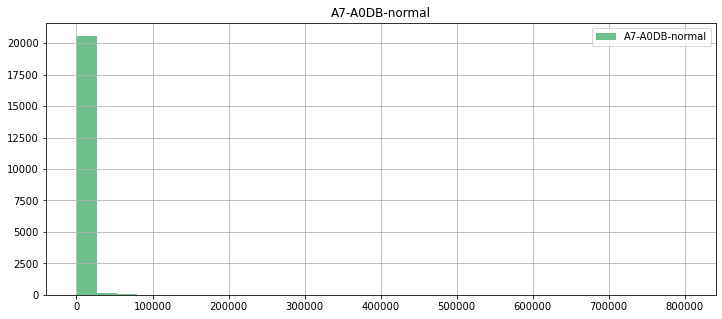

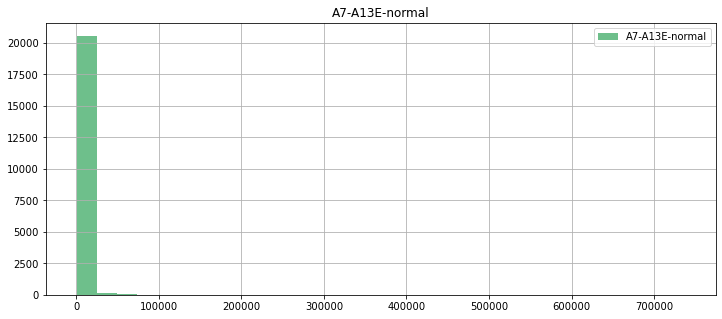

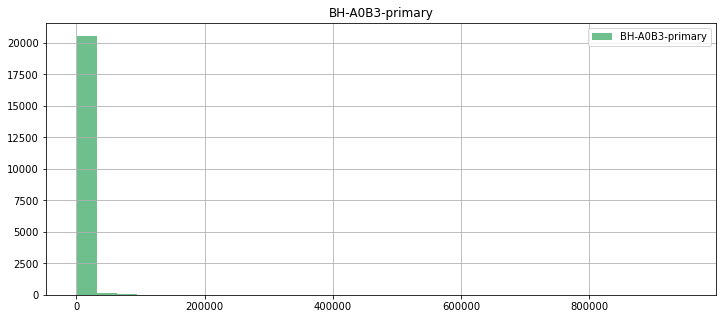

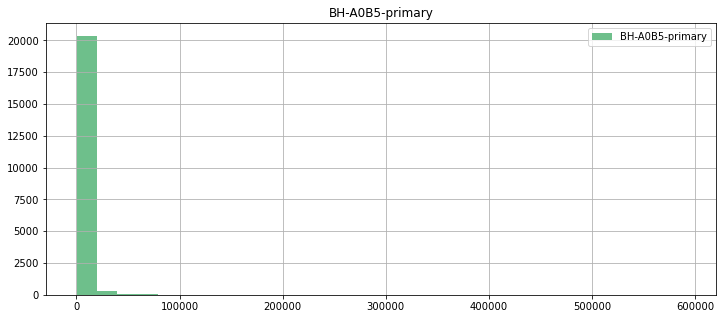

In [8]:
#Task 3 : Histogram for the desired columns 
req_columns = ['A7-A0DB-normal', 'A7-A13E-normal', 'BH-A0B3-primary', 'BH-A0B5-primary']
get_histogram(df2b, req_columns)

In [9]:
#Task 4 
sample_data = get_sample_data(df2b)
sample_data.head()

,Sample name,Mean,Median,Standard deviation
0,A7-A0CE-normal,3308.877255,814.0,12725.531516
1,A7-A0CH-normal,3046.316942,630.0,14145.451194
2,A7-A0D9-normal,2628.131550,350.0,17827.391513
3,A7-A0DB-normal,2354.674445,362.0,13973.914409
4,A7-A13E-normal,2380.702593,427.0,13373.496798


In [10]:
#Task 5a : filtering out rows based on the standard deviations
filtered_df2b = apply_filter(df2b)
filtered_df2b.head()

,Name,Description,A7-A0CE-normal,A7-A0CH-normal,A7-A0D9-normal,A7-A0DB-normal,A7-A13E-normal,A7-A13F-normal,A7-A13G-normal,AC-A23H-normal,...,AC-A2FM-primary,BH-A0AU-primary,BH-A0AY-primary,BH-A0AZ-primary,BH-A0B3-primary,BH-A0B5-primary,BH-A0B7-primary,BH-A0B8-primary,BH-A0BA-primary,BH-A0BC-primary
0,TSPAN6,tetraspanin 6,5404.0,5030.0,3616.0,2425.0,3400.0,3276.0,4611.0,7362.0,...,453.0,1390.0,2418.0,1946.0,2498.0,2709.0,3701.0,2390.0,6725.0,1173.0
1,TNMD,tenomodulin,320.0,2116.0,3616.0,304.0,992.0,2159.0,869.0,234.0,...,74.0,50.0,62.0,54.0,20.0,20.0,88.0,38.0,113.0,92.0
2,DPM1,dolichyl-phosphate mannosyltransferase subunit...,2472.0,1611.0,1254.0,1137.0,1242.0,1295.0,1896.0,1813.0,...,2381.0,2143.0,1675.0,1235.0,1853.0,1739.0,2172.0,1391.0,3203.0,1709.0
3,SCYL3,SCY1 like pseudokinase 3,1483.0,1154.0,820.0,687.0,931.0,1178.0,1262.0,1684.0,...,1759.0,1676.0,1460.0,1705.0,1168.0,3469.0,2544.0,1274.0,4205.0,1687.0
4,C1orf112,chromosome 1 open reading frame 112,312.0,252.0,225.0,241.0,259.0,277.0,256.0,390.0,...,629.0,618.0,406.0,354.0,1166.0,2086.0,325.0,462.0,2162.0,1015.0


In [11]:
#Task 5b
filtered_sample_data = get_sample_data(filtered_df2b)
filtered_sample_data.head()

,Sample name,Mean,Median,Standard deviation
0,A7-A0CE-normal,1483.952256,566.5,2030.854655
1,A7-A0CH-normal,1226.842654,440.5,1750.606029
2,A7-A0D9-normal,958.923439,245.0,1565.576266
3,A7-A0DB-normal,915.061698,256.0,1432.734721
4,A7-A13E-normal,951.364467,296.0,1440.760029


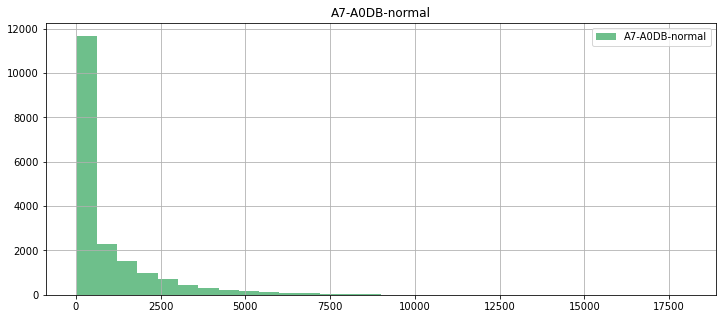

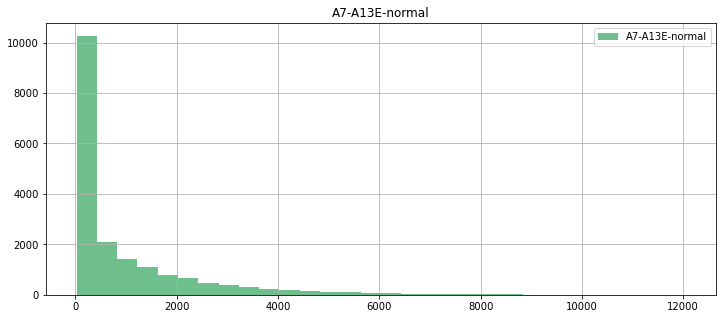

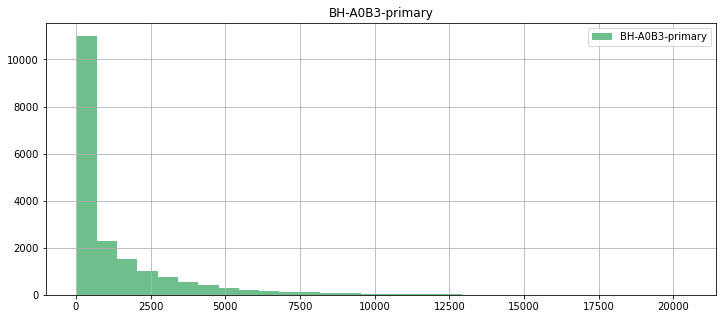

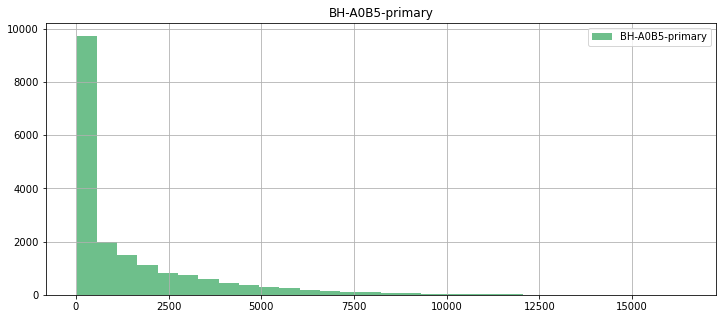

In [12]:
get_histogram(filtered_df2b, req_columns)